### Problem 2.1

In [1]:
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import Altair for high level plotting
import altair as alt
import altair_catplot as altcat

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.plotting
import bebi103

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

# Pevent bulky altair plots
alt.data_transformers.enable('json')

C:\Users\Christina\Anaconda3\envs\be103\lib\site-packages\bebi103\viz.py:30: UserWarning: DataShader import failed with error "No module named 'datashader'".
Features requiring DataShader will not work and you will get exceptions.
  Features requiring DataShader will not work and you will get exceptions.""")


Loading BokehJS ...

DataTransformerRegistry.enable('json')

a) Load the data into a Pandas DataFrame using pd.read_excel(). That's right, Pandas can read Excel files! You might want to read the Pandas documentation to see how it works.

In [2]:
# Load the data into DataFrame df
df = pd.read_excel('../data/wang_cool_gal4.xlsx')

In [3]:
# Check the data
df.head()

,sc15,sc20,sc25,sk15,sk20,sk25,m315,m320,m325
0,1298.547,2737.135,16499.30,8978.031,14251.97,16593.960,20722.62,11703.01,17073.800
1,6798.146,12185.360,12672.19,11221.130,13616.94,6910.673,10373.52,17025.58,15379.370
2,10686.910,1532.901,15832.53,9460.200,17474.90,20934.660,21707.12,17499.83,16991.490
3,2018.864,2357.752,15065.03,9049.072,16042.57,18042.750,21750.27,15657.50,13393.350
4,1551.396,1888.596,16960.67,14132.810,12867.40,23189.560,20820.26,11383.33,7709.297


<p style="background-color:#D9EDF7">
    <b>(a): 3/3</b><br>
</p>

This DataFrame is obviously untidy, what we need to do is separate the system information (i.e. SC, SK, m3) from the temperature information (i.e. 15, 20, 25). Our final DataFrame should have a system column and a column for each temperature.

b) Tidy the DataFrame. Be sure to remove any NaNs.

In [4]:
# Compress, sort, and index by the top level

df_tidy = df.stack(level=0)
df_tidy = df_tidy.sort_index(level=1)
df_tidy = df_tidy.reset_index(level=1)

# Splitting up the index into temperature information and system information
df_tidy['Temperature'] = df_tidy.level_1.str[2:4]
df_tidy.level_1 = df_tidy.level_1.str[:2]

# Renaming the columns with useful names
df_tidy = df_tidy.rename(columns={'level_1': 'Condition', 
                                  0:'GFP fluorescence signal'})
# Reorganizing the columns
df_tidy = df_tidy[['Condition','Temperature','GFP fluorescence signal']]

# Renaming the conditions with more descriptive names
df_tidy = df_tidy.replace({'sc':'SC (original Gal4)', 
                           'sk':'SK (cool Gal4)', 
                           'm3':'m3 Pmyo-3::GFP fusion (control)'})
df_tidy = df_tidy.dropna()
df_tidy = df_tidy.reset_index()

In [5]:
df_tidy

,index,Condition,Temperature,GFP fluorescence signal
0,0,SC (original Gal4),15,1298.5470
1,1,SC (original Gal4),15,6798.1460
2,2,SC (original Gal4),15,10686.9100
3,3,SC (original Gal4),15,2018.8640
4,4,SC (original Gal4),15,1551.3960
5,5,SC (original Gal4),15,1682.3060
6,6,SC (original Gal4),15,5801.6910
7,7,SC (original Gal4),15,3485.5570
8,8,SC (original Gal4),15,5701.0430
9,9,SC (original Gal4),15,2584.7330


This looks tidy, it makes sense, has no NaNs, and has names for conditions and for indices that are intuitive to the reader.

<p style="background-color:#D9EDF7">
    <b>(b): 7/7</b><br>
    Good job!  Mapping the original shorthand to descriptions that are more readily understandable is an excellent practice.<br>
</p>

**c) Do some exploratory data analysis of the data set. That is, make some instructive plots. Discuss why you chose to visualize the data set the way(s) you did. What can you say about Han's cool Gal4 just by looking at the plots?**

We will plot an ECDF. As an aside, attempting to do this in one function using altcat yields an incorrect graph, where the ECDF's are computed for all the values for one condition and then split into three graphs based on temperature. Instead we will make three plots and show them in a column.

In [6]:
T15 = df_tidy['Temperature'] == '15'
T20 = df_tidy['Temperature'] == '20'
T25 = df_tidy['Temperature'] == '25'

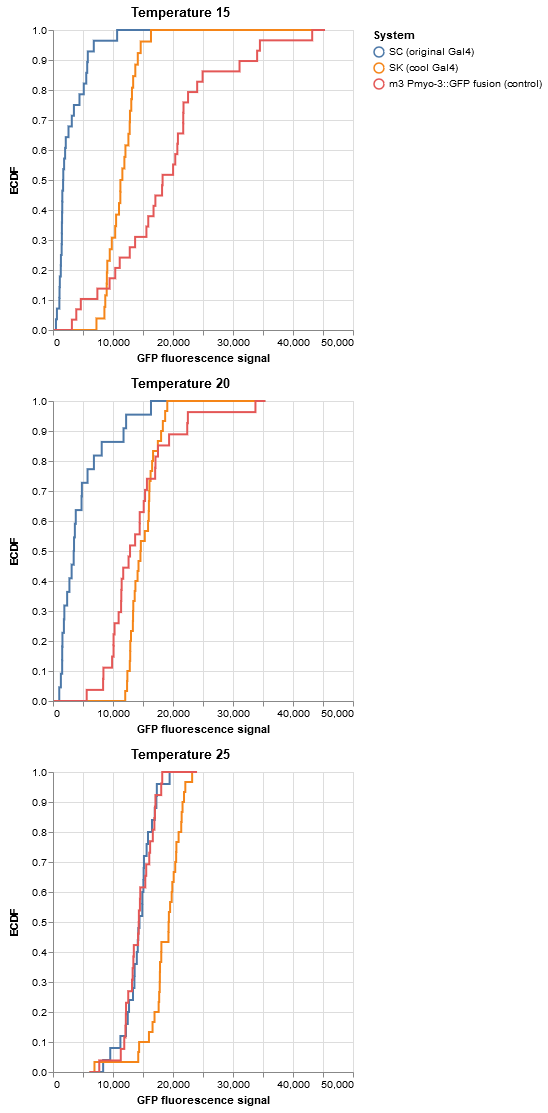

In [7]:
def make_ecdf(bool_index, title):
    c = altcat.catplot(data=df_tidy.loc[bool_index,:],
               mark='line',
               encoding=dict(x=alt.X('GFP fluorescence signal:Q',
                                     scale=alt.Scale(
                                           domain=(0, 50000),
                                           clamp=True)),
                             color = alt.Color('Condition:N', title='System')),
               transform='ecdf'
              ).properties(height=300,
                           width=300,
                           title = title)
    return c

make_ecdf(T15, "Temperature 15") & make_ecdf(T20, "Temperature 20") & make_ecdf(T25, "Temperature 25")

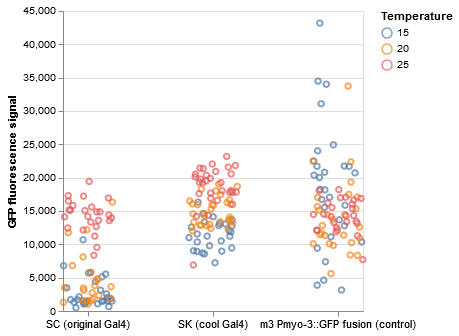

In [8]:
altcat.catplot(data=df_tidy,
               mark='point',
               encoding=dict(x=alt.X('Condition:N'),
                             y=alt.Y('GFP fluorescence signal:Q'),
                             color = alt.Color('Temperature:N', title='Temperature')
                        ),
               transform='jitter'
              ).properties(height=300,
                           width=300
              )

We chose to use both an ECDF plot for each temperature and a jitter plot for all temperatures. The ECDF plot allows us to compare the behavior of the three different systems at each temperature, while the combined jitter plot allows us to easily compare the behavior of each system under different temperatures. The two charts are showing the same data in different ways to permit the isolated evaluation of each system, as well as the comparison between systems. We can see that the Han's cool Gal4 has greater GFP fluorescence signal in the cool condition than the original. However, Han's cool Gal4 has greater GFP fluorescence signal than the original in all conditions, and greater GFP signal than the control in the warm condition, which, depending on the nature of the experiment, could indicate that the system has unwanted effects. We can also see that the control has an inconsistent, wide range of signal levels in the cold condition, possibly indicating a flaw in the experiment in the cold condition. In general the cool Gal4 is cool (works as intended), but more data should be included to show that the higher level of fluorescence than the control in the 25C condition does not indicate that the system is overcompensating or giving off a false signal.

<p style="background-color:#D9EDF7">
    <b>(c): 15/15</b><br>
    Helpful visualization of the data, and nice explanation of your rationale for the different plots.  You also gave a clear interpretation of the results for the biological question at hand.<br>
</p>

<p style="background-color:#D9EDF7">
    -0.5: Please include attributions for the contributions of each group member at the top of every file.<br><br>
    -0: Your explanations of the code cells and comments are helpful, but the course policies indicate that each code cell should perform one specific function and have a corresponding Markdown cell to explain its purpose.
</p>

<p style="background-color:#D9EDF7">
    <b>Total: 24.5/25</b><br>
    Nice work!<br>
</p>